#*Exercise 2:*

#*Importing required packages*

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.datasets import load_iris
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

#*Loading the dataset and looking at the shapes*

In [2]:
iris = load_iris()

#check the shape of iris data
print("Shape of Iris data array: ", iris.data.shape)

A = iris.data
#check the shape of iris target
print("Shape of Iris target labels array: ",iris.target.shape)
unique_labels = np.unique(iris.target)
print("Unique labels in Iris dataset: ", unique_labels)

#How many labels does iris data have?
C = len(unique_labels)
print("Number of labels in Iris dataset: ", C)

Shape of Iris data array:  (150, 4)
Shape of Iris target labels array:  (150,)
Unique labels in Iris dataset:  [0 1 2]
Number of labels in Iris dataset:  3


#*Converting the labels to belong to {+1,-1}*

In [3]:
#In the following code, we create a nx1 vector of target labels

y = 1.0*np.ones([A.shape[0],1])

for i in range(iris.target.shape[0]):
    if iris.target[i] != 1:
        y[i] = -1

 # *Creating the training and test data sets*

In [4]:
n = iris.data.shape[0]         ## Number of data points
d = iris.data.shape[1]         ## Dimension of data points

## Create an index array
indexarr = np.arange(n)        ## index array
np.random.shuffle(indexarr)    ## shuffle the indices
# print(indexarr) #check indexarr after shuffling

## Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data

cutoff = int(0.8*len(indexarr))
print(f"Number of observations in iris data set: {len(indexarr)}")
print(f"Number of observations in train data: {cutoff}")
print(f"Number of observations in test data: {len(indexarr) - cutoff}")

train_data = np.array([iris.data[idx] for idx in indexarr[:cutoff]])
train_label = np.array([y[idx] for idx in indexarr[:cutoff]])
test_data = np.array([iris.data[idx] for idx in indexarr[cutoff:]])
test_label = np.array([y[idx] for idx in indexarr[cutoff:]])

Number of observations in iris data set: 150
Number of observations in train data: 120
Number of observations in test data: 30


In [5]:
def predict(w,x):
    return np.sign(np.dot(w.T, x))

In [6]:
def compute_accuracy(data,labels,model_w):
    count = 0
    for i in range(data.shape[0]):
        if labels[i,:] == predict(model_w, data[i,:]):
            count = count + 1
        else:
            pass
    accuracy = count*100/data.shape[0]
    return accuracy

#*Question 1:*
An appropriate choice of $f_i(w)$ is given as follows:
\begin{align}
f_i(w) &= \frac{\lambda}{2n}\|w\|_2^2 + \frac{1}{n} L(y_i,w^Tx_i)\\
&= \frac{\lambda}{2n}\sum_{j=1}^{d}w_j^2 + \frac{1}{n} L(y_i,w^Tx_i)
\end{align}
where $d$ = Number of features in the data set

#*Question 2:*

In [7]:
def compute_loss_h(w,x,y):
    return max(0, 1 - y*np.dot(w.T,x))

#*Question 3:*

In [8]:
def compute_objfnval(data, labels, model_w, lambda_val):
    f_val = 0
    term_1 = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for data_pt, label in zip(data, labels):
        term_2 = compute_loss_h(model_w, data_pt, label)
        f_val = f_val + term_2
    
    return term_1 + (f_val/n)

#*Question 4:*

In [9]:
def compute_grad_loss_h(x,y,model_w, lambda_val):
    gradients = np.zeros([model_w.shape[0],1])
    for i in range(model_w.shape[0]):
        # print((y*np.dot(model_w.T, x)).shape)
        compare_term = 1 - int(y*np.dot(model_w.T, x)) 
        if compare_term <= 0:
            gradients[i] = (lambda_val*model_w[i])
        else:
            gradients[i] = (lambda_val*model_w[i]) - model_w[i]
    
    return np.multiply(gradients, 1/n)

#*Question 5:*

In [10]:
def OPT1(data,labels,lambda_val, num_epochs):
    t = 1
    
    ## Initialize w
    # w = np.ones( (data.shape[1],1) )
    w = np.random.randn(data.shape[1],1)
    fn_vals_array = []
    weights_array_epochs=[]
    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr) #shuffle every epoch
        for i in np.nditer(arr): #Pass through the data points
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_val)
            # print("Gradient: ", g_i)
            # Update w using w <- w - step * g_i (w)
            w = np.subtract(w, np.multiply(step, g_i))
            # print("w: ", w)
            t = t+1
            if t>1e4:
              t=1
        fn_vals_array.append(compute_objfnval(data, labels, w, lambda_val))
        weights_array_epochs.append(w)
    return w, fn_vals_array, weights_array_epochs

#*Question 6_a:*
In OPT1, use num_epochs=10000, step=$\frac{1}{t}$ . For each $\lambda \in \{10^{-3}, 10^{-2}, 0.1, 1, 10\}$, perform the follow-
ing tasks:

Text(0.5, 1.0, 'Plot of Objective function valuSes every epochs')

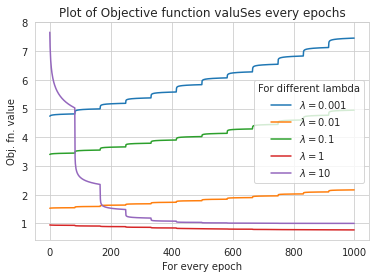

In [11]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
w_opt = {}
fn_vals_array = {}
weights_array = {}

for lambda_val in lambda_array:
    w_opt[lambda_val], fn_vals_array[lambda_val], weights_array[lambda_val] = OPT1(train_data, train_label, lambda_val, epochs)
    plt.plot(fn_vals_array[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epoch')
plt.ylabel('Obj. fn. value')
plt.legend(title = "For different lambda")
plt.title("Plot of Objective function valuSes every epochs")

#*Question 6_b:*

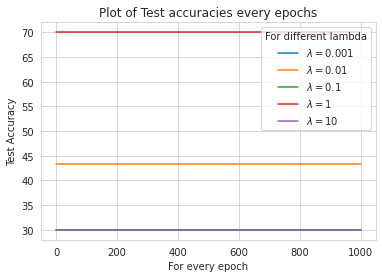

In [12]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
accuracy = {}
for lambda_val in lambda_array:
    accuracy[lambda_val] = [0 for _ in range(len(weights_array[lambda_val]))] 
    
    for j in range(len(weights_array[lambda_val])):
        accuracy[lambda_val][j] = compute_accuracy(test_data, test_label, weights_array[lambda_val][j])
    plt.plot(accuracy[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epoch')
plt.ylabel('Test Accuracy')
plt.legend(title = "For different lambda")
plt.title("Plot of Test accuracies every epochs")
plt.show()

**(c) [R]** Plot the train set accuracy everyochs. Use different colors for different $\lambda$ values.

Text(0.5, 1.0, 'Plot of Train accuracies every epochs')

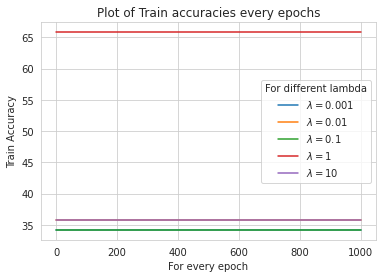

In [13]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
train_accuracy = {}
for lambda_val in lambda_array:
    train_accuracy[lambda_val] = [0 for _ in range(len(weights_array[lambda_val]))]
    for j in range(len(weights_array[lambda_val])):
        train_accuracy[lambda_val][j] = compute_accuracy(train_data, train_label, weights_array[lambda_val][j])
    plt.plot(train_accuracy[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epoch')
plt.ylabel('Train Accuracy')
plt.legend(title = "For different lambda")
plt.title("Plot of Train accuracies every epochs")

**(d) [R]** Tabulate the final test set accuracy and train set accuracy for each $\lambda$ value.

In [14]:
train_accuracy_final = [0 for _ in range(len(lambda_array))]
test_accuracy_final = [0 for _ in range(len(lambda_array))]

for j in range(len(lambda_array)):
    train_accuracy_final[j] = compute_accuracy(train_data, train_label, w_opt[lambda_array[j]])
    test_accuracy_final[j] = compute_accuracy(test_data, test_label, w_opt[lambda_array[j]])

df = pd.DataFrame(list(zip(lambda_array, train_accuracy_final, test_accuracy_final)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
df.set_index(np.arange(1,len(lambda_array)+1))

Lambda  Train Accuracy  Test Accuracy
1   0.001       34.166667      30.000000
2   0.010       35.833333      43.333333
3   0.100       34.166667      30.000000
4   1.000       65.833333      70.000000
5  10.000       35.833333      30.000000

#*(e)* 
##*Observations:*
>* Training accuracy is highest for $\lambda = 1$ 
>* Test accuracy is highest for $\lambda = 1$.

#*Question 7:* 
We propose the norm of difference of $w_{k}$ and $w_{k-1}$ for every iteration $k$ as the stopping criterion, i.e. we stop at iteration $k$ if $\|w_{k}- w_{k-1} < \epsilon\|$ for some $\epsilon$. We choose $\epsilon = 10^{-5}$ in our algorithm. 
- We display the results obtained for Hinge loss from OPT1 algorithm and OPT1_modified algorithm.
- The best $\lambda$ that was observed was 1.
- We display objective function values, test accuracies and train accuracies for each of the 2 algorithms.


### Gradient computation for Hinge loss:
The gradient is computed by differentiating $f_i(w)$ w.r.t. each of the components of $w$. The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}(\lambda\ w_k -y\ x_{ik}) &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}

#*Defining the modified OPT1 function with our stopping criterion*

In [15]:
def OPT1_modified(data,labels,lambda_val, loss, eps):
    t = 1  
    ## Initialize w
    # w = np.ones( (data.shape[1],1) )
    w = np.random.randn(data.shape[1],1)
    fn_vals_array = []
    weights_array_epochs = []
    arr = np.arange(data.shape[0])
    epoch = 0
    while True:
        w_prev = w
        np.random.shuffle(arr) #shuffle every epoch
        for i in np.nditer(arr): #Pass through the data points
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_val, loss)
            w = np.subtract(w, np.multiply(step, g_i))
            # print("w: ", w)
            t = t+1
            if t>1e4:
              t=1
        fn_vals_array.append(compute_objfnval(data, labels, w, lambda_val, loss))
        weights_array_epochs.append(w)
        if np.linalg.norm(w_prev - w) < eps:
            break
        # w_prev = w_next
        epoch += 1

    return w, fn_vals_array, weights_array_epochs

#*Computing the objective function value for best lambda and hinge loss*

In [16]:
hinge = 1
logistic = 2
sq_hinge = 3
n1 = train_data.shape[0]

#*Defining the Compute_objfnval function*

In [17]:
def compute_objfnval(data, labels, model_w, lambda_val, loss):
    f_val = 0
    term_1 = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for data_pt, label in zip(data, labels):
        term_2 = compute_loss_h(model_w, data_pt, label, loss)
        f_val = f_val + term_2
    return term_1 + (f_val/n)

 # *Defining the Compute_loss function*

In [18]:
def compute_loss_h(w,x,y, loss):
    z = y*np.dot(w.T,x)
    if loss == hinge:
        return max(0, 1 - z)
    elif loss == logistic:
        return math.log(1+np.exp(-z))
    elif loss == sq_hinge:
        return (max(0, 1-z))**2
    else:
        raise ValueError("Loss type undefined")

#*Defining the OPT1 function*

In [19]:
def OPT1(data,labels,lambda_val, num_epochs, loss):
    t = 1
    w = np.random.randn(data.shape[1],1)
    fn_vals_array = []
    weights_array_epochs = []
    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr) #shuffle every epoch
        for i in np.nditer(arr): #Pass through the data points
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_val, loss)
            # print("Gradient: ", g_i)
            # Update w using w <- w - step * g_i (w)
            w = np.subtract(w, np.multiply(step, g_i))
            # print("w: ", w)
            t = t+1
            if t>1e4:
              t=1
        fn_vals_array.append(compute_objfnval(data, labels, w, lambda_val, loss))
        weights_array_epochs.append(w)
    return w, fn_vals_array, weights_array_epochs

# *Defining the compute_grad_loss_h function*

In [20]:
def compute_grad_loss_h(x,y,model_w, lambda_val, loss):
    gradients = np.zeros([model_w.shape[0],1])

    if loss == hinge:
        for i in range(model_w.shape[0]):
            compare_term = 1 - int(y*np.dot(model_w.T, x)) 
            if compare_term <= 0:
                gradients[i] = (lambda_val*model_w[i])
            else:
                gradients[i] = (lambda_val*model_w[i]) - y*x[i]
        return np.multiply(gradients, 1/n1)

    elif loss == logistic:
        for i in range(model_w.shape[0]):
            gradients[i] = (lambda_val*model_w[i]) + ((np.exp(-y*np.dot(model_w.T,x)))*(-y*x[i]))/(1+np.exp(-y*np.dot(model_w.T,x)))[0]
        return np.multiply(gradients, 1/n1)

    elif loss == sq_hinge:
        for i in range(model_w.shape[0]):
            compare_term = 1 - int(y*np.dot(model_w.T, x)) 
            if compare_term <= 0:
                gradients[i] = (lambda_val*model_w[i])
            else:
                gradients[i] = (lambda_val*model_w[i]) - (2*(1-(y*np.dot(model_w.T,x)))*y*x[i])
        return np.multiply(gradients, 1/n1)
    
    else:
        raise ValueError("Loss type undefined")

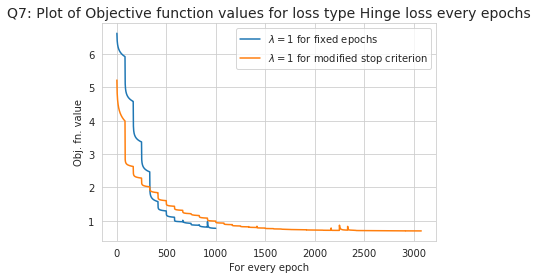

In [35]:
loss_names = {hinge:'Hinge loss', logistic: 'Logistic', sq_hinge: 'Squared Hinge'}
loss = hinge
lambda_val = 1
epochs = 1000
eps = 1e-5
all_results_q7 = {}

w_opt = {}
fn_vals_array = {}
weights_array_epochs = {}
w_opt2 = {}
fn_vals_array2 = {}
weights_array_epochs2 = {}

w_opt_q7, fn_vals_array_q7, weights_array_epochs_q7 = OPT1(train_data, train_label, lambda_val, epochs, loss)
plt.plot(fn_vals_array_q7, label = f'$\lambda = {lambda_val}$ for fixed epochs')

w_opt2_q7, fn_vals_array2_q7, weights_array_epochs2_q7 = OPT1_modified(train_data, train_label, lambda_val, loss, eps)
plt.plot(fn_vals_array2_q7, label = f'$\lambda = {lambda_val}$ for modified stop criterion')

all_results_q7['OPT1'] = [w_opt_q7, fn_vals_array_q7, weights_array_epochs_q7]
all_results_q7['OPT1_modified'] = [w_opt2_q7, fn_vals_array2_q7, weights_array_epochs2_q7]

plt.title(f"Q7: Plot of Objective function values for loss type {loss_names[loss]} every epochs", fontsize = 14)
plt.xlabel('For every epoch')
plt.ylabel('Obj. fn. value')
plt.legend(title = "For different lambda", loc = (1,0))

plt.legend()
plt.show()

#*Computing the test accuracies observed every epoch for best lambda and hinge loss*

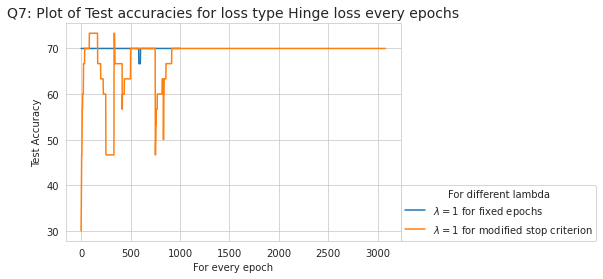

In [36]:
all_test_accuracies_q7 = {}

accuracy_q7 = [0 for _ in range(len(all_results_q7['OPT1'][2]))] 
accuracy2_q7 = [0 for _ in range(len(all_results_q7['OPT1_modified'][2]))]
        
for j in range(len(accuracy_q7)):
    accuracy_q7[j] = compute_accuracy(test_data, test_label, all_results_q7['OPT1'][2][j])
plt.plot(accuracy_q7, label = f'$\lambda = {lambda_val}$ for fixed epochs')

for j in range(len(accuracy2_q7)):
    accuracy2_q7[j] = compute_accuracy(test_data, test_label, all_results_q7['OPT1_modified'][2][j])
plt.plot(accuracy2_q7, label = f'$\lambda = {lambda_val}$ for modified stop criterion')

all_test_accuracies_q7['OPT1'] = accuracy_q7
all_test_accuracies_q7['OPT1_modified'] = accuracy2_q7

plt.xlabel('For every epoch')
plt.ylabel('Test Accuracy')
plt.legend(title = "For different lambda", loc = (1,0))
plt.title(f"Q7: Plot of Test accuracies for loss type {loss_names[loss]} every epochs", fontsize = 14)

plt.show()

#*Computing the train accuracies observed every epoch for best lambda and hinge loss*

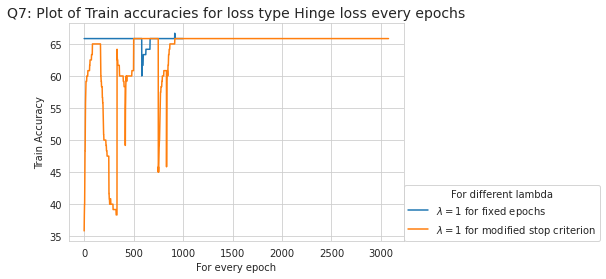

In [37]:
all_train_accuracies_q7 = {}

train_accuracy_q7 = [0 for _ in range(len(all_results_q7['OPT1'][2]))] 
train_accuracy2_q7 = [0 for _ in range(len(all_results_q7['OPT1_modified'][2]))]
        
for j in range(len(train_accuracy_q7)):
    train_accuracy_q7[j] = compute_accuracy(train_data, train_label, all_results_q7['OPT1'][2][j])
plt.plot(train_accuracy_q7, label = f'$\lambda = {lambda_val}$ for fixed epochs')

for j in range(len(train_accuracy2_q7)):
    train_accuracy2_q7[j] = compute_accuracy(train_data, train_label, all_results_q7['OPT1_modified'][2][j])
plt.plot(train_accuracy2_q7, label = f'$\lambda = {lambda_val}$ for modified stop criterion')

all_train_accuracies_q7['OPT1'] = train_accuracy_q7
all_train_accuracies_q7['OPT1_modified'] = train_accuracy2_q7

plt.xlabel('For every epoch')
plt.ylabel('Train Accuracy')
plt.legend(title = "For different lambda", loc = (1,0))
plt.title(f"Q7: Plot of Train accuracies for loss type {loss_names[loss]} every epochs", fontsize = 14)

plt.show()

### *Comments:*
- We observe that the objective function value increases for the modified OPT1 algorithm, in comparison to the original OPT1 algorithm. 
- The algorithm converges slower in the new algorithm, with the new algorithm running for almost 3000 epochs, whereas our OPT1 algorithm runs for 1000 epochs.
- The test accuracies and train accuracies come out to very similar in both the algorithms (with fixed epochs and with our defined stopping criterion). The train accuracies come out to be ~$70\%$, whereas test accuracies came out to be ~$30\%$

#*Question 8:*

Let us compute the gradients for the logistic functions and the squared hinge functions as well.  


- For Logistic loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} = \frac{\lambda\ w_k}{n} + \frac{1}{1+exp(-y\ w^T x_{ik})}exp(-y\ w^T x_{ik})(-y\ x_{ik})
\end{align}

- For Squared Hinge loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}[\lambda\ w_k -2(1-y\ w^T x_{ik})\ y\ x_{ik}] &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}

#*(a)*

#*Computing the objective function value for all loss functions*

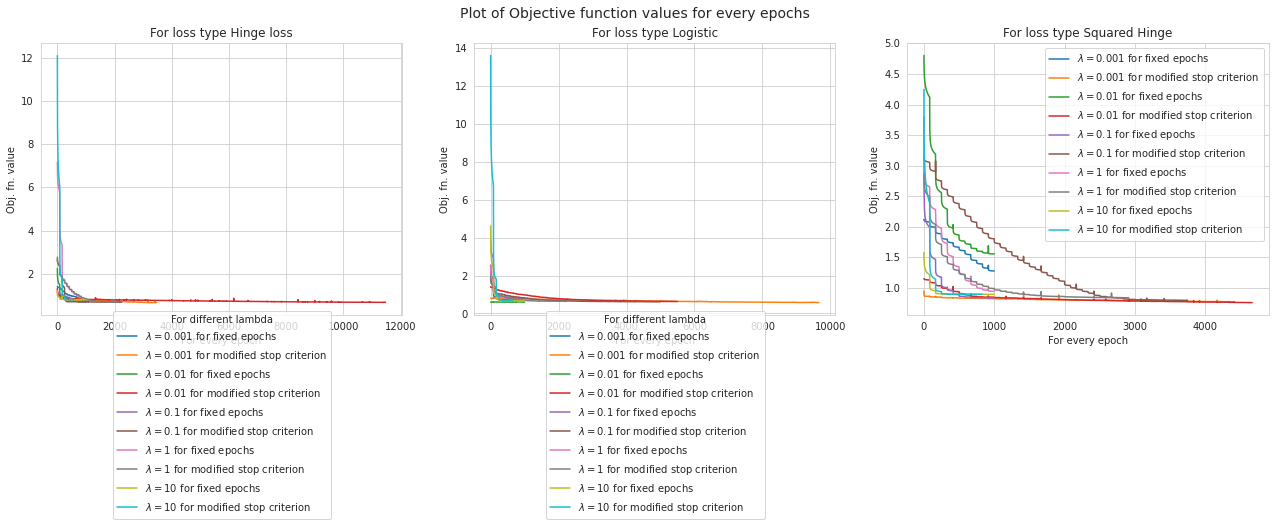

In [38]:
loss_types = [hinge, logistic, sq_hinge]
loss_names = {hinge:'Hinge loss', logistic: 'Logistic', sq_hinge: 'Squared Hinge'}
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
eps = 1e-5
all_results = {}
all_results2 = {}
fig, ax = plt.subplots(1,3, figsize = (22,5))
plt.suptitle("Plot of Objective function values for every epochs", fontsize = 14)
i = 0
for loss in loss_types:
    w_opt = {}
    fn_vals_array = {}
    weights_array_epochs = {}
    w_opt2 = {}
    fn_vals_array2 = {}
    weights_array_epochs2 = {}
    for lambda_val in lambda_array:
        w_opt[lambda_val], fn_vals_array[lambda_val], weights_array_epochs[lambda_val] = OPT1(train_data, train_label, lambda_val, epochs, loss)
        ax[i].plot(fn_vals_array[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        w_opt2[lambda_val], fn_vals_array2[lambda_val], weights_array_epochs2[lambda_val] = OPT1_modified(train_data, train_label, lambda_val, loss, eps)
        ax[i].plot(fn_vals_array2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    
    all_results[loss] = [w_opt, fn_vals_array, weights_array_epochs]
    all_results2[loss] = [w_opt2, fn_vals_array2, weights_array_epochs2]

    plt.title(f"For loss type {loss}")
    ax[i].set_xlabel('For every epoch')
    ax[i].set_ylabel('Obj. fn. value')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1
plt.legend()
plt.show()


#*(b)*

# *Computing the test accuracy values for all loss functions*

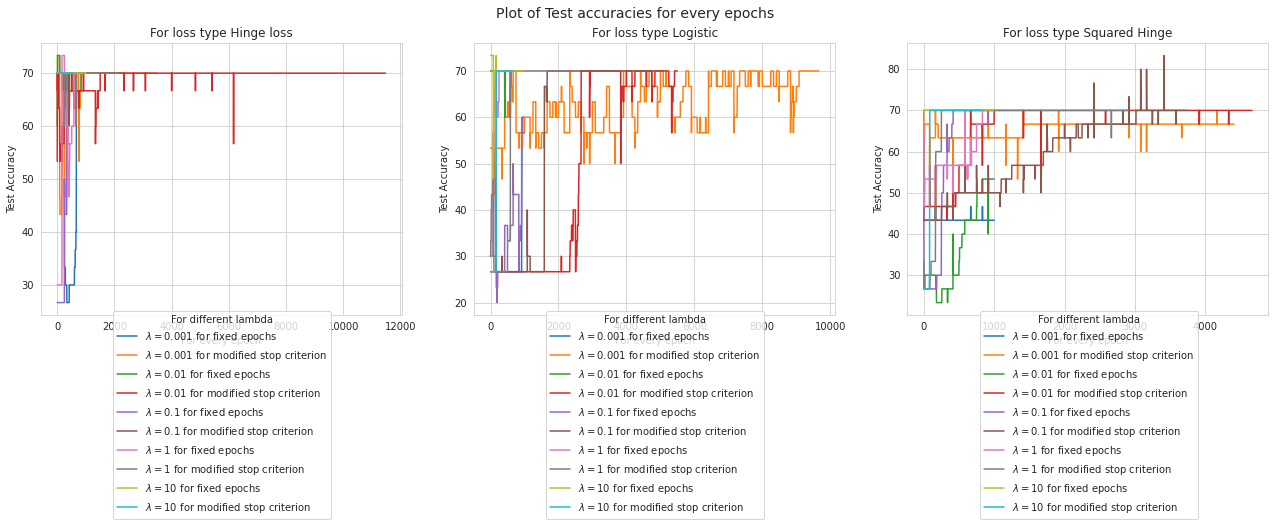

In [39]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
all_test_accuracies = {}
all_test_accuracies2 = {}
fig, ax = plt.subplots(1,3, figsize = (22,5))
plt.suptitle("Plot of Test accuracies for every epochs", fontsize = 14)
i = 0
for loss in loss_types:
    accuracy = {}
    accuracy2 = {}
    
    for lambda_val in lambda_array:
        accuracy[lambda_val] = [0 for _ in range(len(all_results[loss][2 ][lambda_val]))] 
        accuracy2[lambda_val] = [0 for _ in range(len(all_results2[loss][2][lambda_val]))]
        
        for j in range(len(all_results[loss][2][lambda_val])):
            accuracy[lambda_val][j] = compute_accuracy(test_data, test_label, all_results[loss][2][lambda_val][j])
        ax[i].plot(accuracy[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        
        for j in range(len(all_results2[loss][2][lambda_val])):
            accuracy2[lambda_val][j] = compute_accuracy(test_data, test_label, all_results2[loss][2][lambda_val][j])
        ax[i].plot(accuracy2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    
    all_test_accuracies[loss] = accuracy
    all_test_accuracies2[loss] = accuracy2
    
    ax[i].set_xlabel('For every epoch')
    ax[i].set_ylabel('Test Accuracy')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1

plt.show()

#*(c)*

# *Computing the train accuracy values for all loss functions*

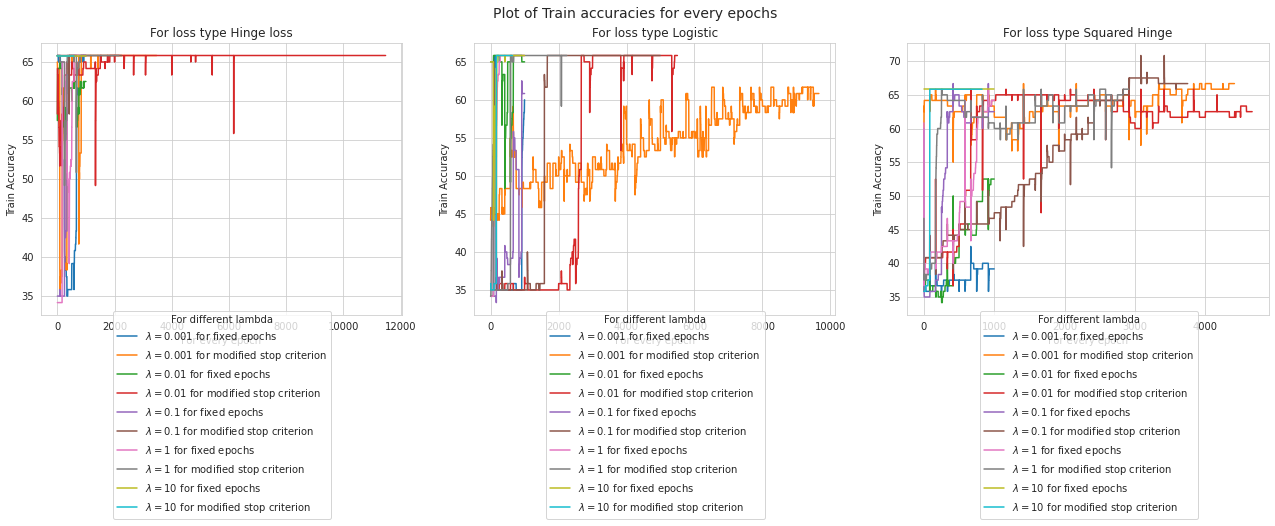

In [40]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
all_train_accuracies = {}
all_train_accuracies2 = {}
fig, ax = plt.subplots(1,3, figsize = (22,5))
plt.suptitle("Plot of Train accuracies for every epochs", fontsize = 14)
i = 0
for loss in loss_types:
    train_accuracy = {}
    train_accuracy2 = {}

    for lambda_val in lambda_array:
        train_accuracy[lambda_val] = [0 for _ in range(len(all_results[loss][2][lambda_val]))]
        train_accuracy2[lambda_val] = [0 for _ in range(len(all_results2[loss][2][lambda_val]))]
        
        for j in range(len(all_results[loss][2][lambda_val])):
            train_accuracy[lambda_val][j] = compute_accuracy(train_data, train_label, all_results[loss][2][lambda_val][j])
        ax[i].plot(train_accuracy[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        
        for j in range(len(all_results2[loss][2][lambda_val])):
            train_accuracy2[lambda_val][j] = compute_accuracy(train_data, train_label, all_results2[loss][2][lambda_val][j])
        ax[i].plot(train_accuracy2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    all_train_accuracies[loss] = train_accuracy
    all_train_accuracies2[loss] = train_accuracy2

    ax[i].set_xlabel('For every epoch')
    ax[i].set_ylabel('Train Accuracy')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1
plt.show()

#*(d)*

#*Tabulating the train and test accuracy values for each lambda values*

In [41]:
i = 1
df_list = {}
df_list2 = {}
for loss in loss_types:
    train_accuracy_final = [0 for _ in range(len(lambda_array))]
    test_accuracy_final = [0 for _ in range(len(lambda_array))]
    train_accuracy_final2 = [0 for _ in range(len(lambda_array))]
    test_accuracy_final2 = [0 for _ in range(len(lambda_array))]

    for j in range(len(lambda_array)):
        train_accuracy_final[j] = compute_accuracy(train_data, train_label, all_results[loss][0][lambda_array[j]])
        test_accuracy_final[j] = compute_accuracy(test_data, test_label, all_results[loss][0][lambda_array[j]])
        
        train_accuracy_final2[j] = compute_accuracy(train_data, train_label, all_results2[loss][0][lambda_array[j]])
        test_accuracy_final2[j] = compute_accuracy(test_data, test_label, all_results2[loss][0][lambda_array[j]])
    
    df_name = 'df' + str(i)
    df = pd.DataFrame(list(zip(lambda_array, train_accuracy_final, test_accuracy_final)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
    df.index = np.arange(1,len(lambda_array)+1)

    df2 = pd.DataFrame(list(zip(lambda_array, train_accuracy_final2, test_accuracy_final2)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
    df2.index = np.arange(1,len(lambda_array)+1)
    
    df_list[df_name] = df
    df_list2[df_name] = df2
    i += 1

#*For OPT1 with fixed number of epochs:*

##*For Hinge loss*

In [42]:
df_list['df1']

Lambda  Train Accuracy  Test Accuracy
1   0.001       65.833333           70.0
2   0.010       62.500000           70.0
3   0.100       65.833333           70.0
4   1.000       65.833333           70.0
5  10.000       65.833333           70.0

##*For Logistic loss*

In [43]:
df_list['df2']

Lambda  Train Accuracy  Test Accuracy
1   0.001       60.000000      60.000000
2   0.010       65.000000      70.000000
3   0.100       60.833333      56.666667
4   1.000       65.833333      70.000000
5  10.000       65.833333      70.000000

##*For Squared Hinge loss*

In [44]:
df_list['df3']

Lambda  Train Accuracy  Test Accuracy
1   0.001       39.166667      43.333333
2   0.010       52.500000      53.333333
3   0.100       62.500000      70.000000
4   1.000       64.166667      70.000000
5  10.000       65.833333      70.000000

#*For OPT1 modified with our stopping criterion:*

##*For Hinge loss*

In [45]:
df_list2['df1']

Lambda  Train Accuracy  Test Accuracy
1   0.001       65.833333           70.0
2   0.010       65.833333           70.0
3   0.100       65.833333           70.0
4   1.000       65.833333           70.0
5  10.000       65.833333           70.0

##*For Logistic loss*

In [46]:
df_list2['df2']

Lambda  Train Accuracy  Test Accuracy
1   0.001       60.833333           70.0
2   0.010       65.833333           70.0
3   0.100       65.833333           70.0
4   1.000       65.833333           70.0
5  10.000       65.833333           70.0

##*For Squared Hinge loss*

In [47]:
df_list2['df3']

Lambda  Train Accuracy  Test Accuracy
1   0.001       66.666667      66.666667
2   0.010       62.500000      70.000000
3   0.100       66.666667      70.000000
4   1.000       65.833333      70.000000
5  10.000       65.833333      70.000000

#*(e)*
##*Observation*
>* We observe that the modified algorithm with our stopping criterion runs for more number of epochs in many cases.